#### Importing dependencies

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

#### Loading the dataset

In [2]:
data = load_iris(as_frame=True)

In [3]:
feature_data=data['data']
target_data=data['target']

In [4]:
frame = data['frame']

In [5]:
from sklearn.model_selection import train_test_split
from logzero import logger

In [32]:
train_test_split?

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation and
``next(ShuffleSplit().split(X, y))`` and application to input data
into a single call for splitting (and optionally subsampling) data in a
oneliner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

train

In [33]:
feature_data.shape

(150, 4)

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(feature_data,target_data,random_state= 42, train_size = 0.5, test_size=0.5)
logger.info(f"Shape after test train split:\nTrain:{X_train.shape}{Y_train.shape}\nTest:{X_test.shape}{Y_test.shape}")

[I 230214 12:51:43 3158993176:2] Shape after test train split:
    Train:(75, 4)(75,)
    Test:(75, 4)(75,)


#### Visualization:
###### PCA

In [7]:
from sklearn.decomposition import PCA

In [8]:
## Initializing the object for PCA-decomposition
pca = PCA(n_components=2)
pca_components=pca.fit_transform(feature_data)

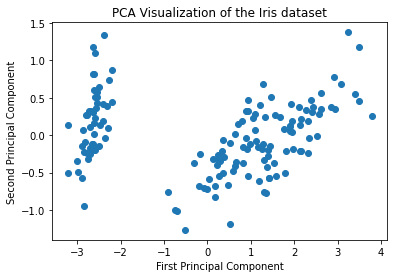

In [9]:
##Plotting the transformed components
plt.scatter(pca_components[:,0], pca_components[:,1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Visualization of the Iris dataset')
plt.show()

In [10]:
pca_components.shape

(150, 2)

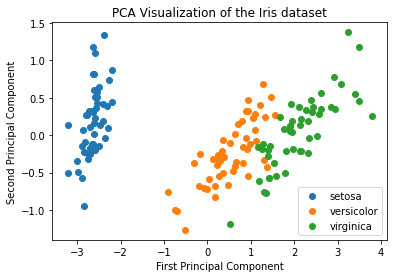

In [11]:
## Plotting the class-lables:
for _id, _label in enumerate(data.target_names):
    samples = pca_components[target_data == _id]
    plt.scatter(samples[:,0], samples[:,1], label = _label)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Visualization of the Iris dataset')
plt.legend()
plt.show()

##### t-SNE

In [12]:
from sklearn.manifold import TSNE

In [13]:
tsne = TSNE(n_components=2)
tsne_components = tsne.fit_transform(feature_data)

/home/manisha/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/manisha/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


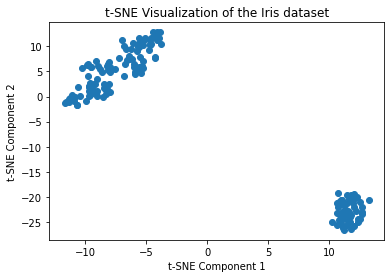

In [14]:
plt.scatter(tsne_components[:,0], tsne_components[:,1])
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of the Iris dataset')
plt.show()

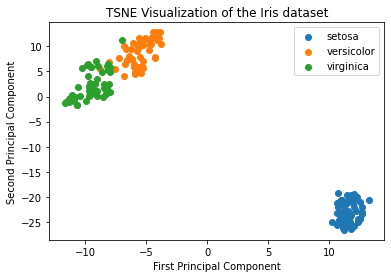

In [15]:
for _id, _label in enumerate(data.target_names):
    samples = tsne_components[target_data == _id]
    plt.scatter(samples[:,0], samples[:,1], label = _label)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('TSNE Visualization of the Iris dataset')
plt.legend()
plt.show()

### Implimenting SVM Classifier

In [16]:
from sklearn import svm

In [17]:
model = svm.SVC(kernel='linear')

model.fit(X=X_train, y=Y_train)

SVC(kernel='linear')

In [18]:
pred=model.predict(X= X_test)

In [19]:
pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [20]:
print(f"Accuracy:{np.mean(Y_test == pred)}")

Accuracy:1.0


In [21]:
from sklearn.metrics import accuracy_score

print(f"Accuracy:{accuracy_score(y_pred=pred, y_true=Y_test)}")

Accuracy:1.0


#### Random Forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
model = RandomForestClassifier(n_estimators= 10)
model.fit(X=X_train, y=Y_train)
y_pred=model.predict(X=X_test)

In [24]:
print(f"Accuracy:{np.mean(Y_test == y_pred)}")

Accuracy:1.0


In [28]:
data2 = load_iris()

### Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
dc_model = DecisionTreeClassifier()
dc_model.fit(X=X_train, y=Y_train)
dc_pred = dc_model.predict(X=X_test)

In [27]:
dc_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

##### Visualizing Decision tree we just built

In [28]:
from sklearn.tree import plot_tree

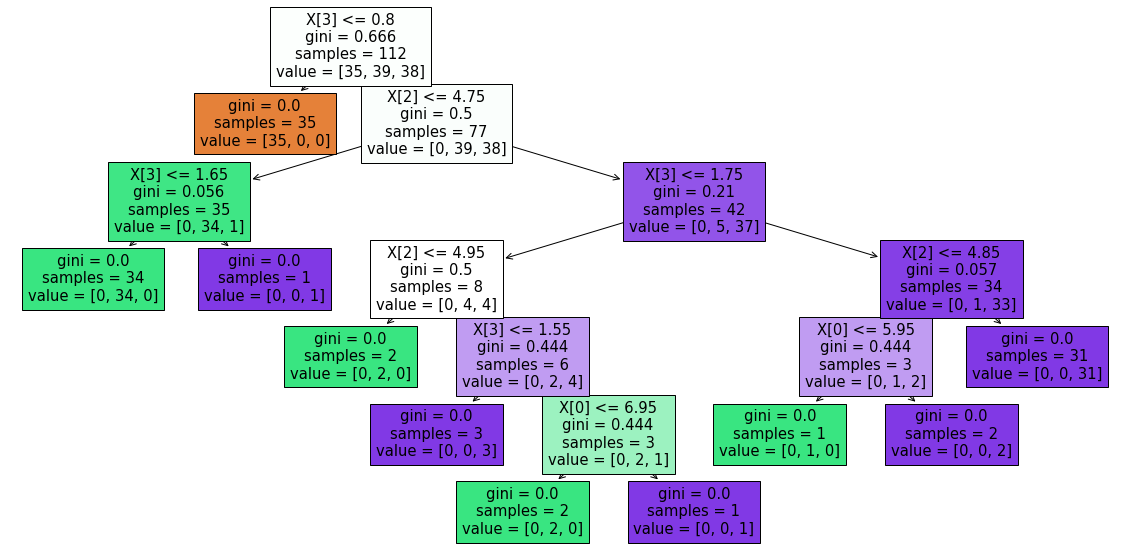

In [29]:
plt.figure(figsize=(20,10))
plot_tree(dc_model, filled=True)
plt.show()

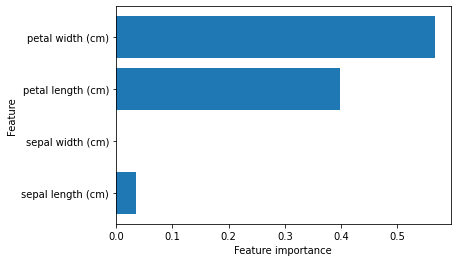

In [30]:
# Plot the feature importances
n_features = data.data.shape[1]
plt.barh(range(n_features), dc_model.feature_importances_, align='center')
plt.yticks(np.arange(n_features), data.feature_names)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

### Trying classification using simple Multi-layer perceptron

In [1]:
from sklearn.neural_network import MLPClassifier

In [31]:
mlp_model = MLPClassifier(hidden_layer_sizes=(10, 20, 10))
mlp_model.fit(X=X_train, y=Y_train)
mlp_pred = mlp_model.predict(X=X_test)

/home/manisha/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [36]:
mlp_pred

array([1, 0, 1, 1, 1, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0])

In [37]:
mlp_model.predict_proba(X=X_test)

array([[0.20070973, 0.43086615, 0.36842412],
       [0.79997947, 0.03937241, 0.16064812],
       [0.21128   , 0.43773858, 0.35098142],
       [0.20143113, 0.43007385, 0.36849502],
       [0.19812162, 0.43372235, 0.36815603],
       [0.77176559, 0.04879749, 0.17943692],
       [0.2943132 , 0.33455503, 0.37113177],
       [0.19197831, 0.44059012, 0.36743156],
       [0.21113552, 0.42333744, 0.36552704],
       [0.21395566, 0.41715307, 0.36889127],
       [0.19287866, 0.43957569, 0.36754565],
       [0.7286961 , 0.06507902, 0.20622488],
       [0.7935028 , 0.04151712, 0.16498008],
       [0.72968775, 0.06468209, 0.20563015],
       [0.81654453, 0.03415615, 0.14929932],
       [0.19919024, 0.43262328, 0.36818647],
       [0.18748716, 0.44591901, 0.36659383],
       [0.2106528 , 0.42015437, 0.36919283],
       [0.20288095, 0.42848654, 0.36863252],
       [0.19398864, 0.44085162, 0.36515974],
       [0.73040023, 0.06428412, 0.20531565],
       [0.19656753, 0.43544787, 0.3679846 ],
       [0.

In [38]:
from sklearn.metrics import confusion_matrix

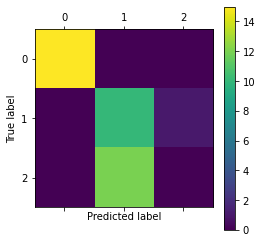

In [39]:
# Plotting the confusion matrix
cm = confusion_matrix(y_true=Y_test, y_pred=mlp_pred)
plt.matshow(cm)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()